In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multitest import multipletests

In [2]:
A10_D11_B18 = pd.read_table("A10_D11_B18.txt")
A10_D11_B18.columns = ["Nucleus", "CRE-\nCRE", "CRE-\ncontrol"]
A10_D11_B18["Probe"] = "A10_D11_B18"
O12_J10_D3 = pd.read_table("O12_J10_D3.txt")
O12_J10_D3.columns = ["Nucleus", "CRE-\nCRE", "CRE-\ncontrol"]
O12_J10_D3["Probe"] = "O12_J10_D3"

In [3]:
combined = pd.concat([A10_D11_B18, O12_J10_D3])

In [4]:
combined = combined.apply(lambda x: x.str.replace(',','.'))
combined[["CRE-\nCRE", "CRE-\ncontrol"]] = combined[["CRE-\nCRE", "CRE-\ncontrol"]].astype(float)

In [5]:
melt = pd.melt(combined, id_vars=["Nucleus", "Probe"])

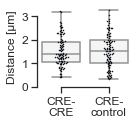

In [11]:
cm = 1/2.54
sns.set(style="ticks", font="Arial")
sns.set_context("notebook", rc={"font.size":1,"axes.titlesize":16, 
                                "axes.labelsize": 12, "xtick.labelsize": 12,
                                "ytick.labelsize": 12})   
plt.figure(figsize=(4.5*cm, 4*cm))
g = sns.boxplot(data=melt.loc[melt["Probe"]=="A10_D11_B18"], 
                x="variable", 
                y="value",
                color="whitesmoke",
                fliersize=0
               )
sns.swarmplot(data=melt.loc[melt["Probe"]=="A10_D11_B18"], 
              x="variable", 
              y="value", 
              ax=g,
              edgecolor="black",
              linewidth=0.5,
              s=1
             )
g.set(xlabel="",
      title="",
      ylabel="Distance [μm]",
      ylim=[0,3.4])
plt.yticks([0, 1, 2, 3])
sns.despine(trim=True)
plt.tight_layout()
plt.savefig("Chr1_distances.svg")

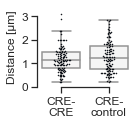

In [7]:
cm = 1/2.54
sns.set(style="ticks", font="Arial")
sns.set_context("notebook", rc={"font.size":1,"axes.titlesize":16, 
                                "axes.labelsize": 12, "xtick.labelsize": 12,
                                "ytick.labelsize": 12})   
plt.figure(figsize=(4.5*cm, 4*cm))
g = sns.boxplot(data=melt.loc[melt["Probe"]=="O12_J10_D3"], 
                x="variable", 
                y="value",
                color="whitesmoke",
                fliersize=0
               )
sns.swarmplot(data=melt.loc[melt["Probe"]=="O12_J10_D3"], 
              x="variable", 
              y="value", 
              ax=g,
              edgecolor="black",
              linewidth=0.5,
              s=1
             )
g.set(xlabel="",
      title="",
      ylabel="Distance [μm]",
      ylim=[0,3.4])
plt.yticks([0, 1, 2, 3])
sns.despine(trim=True)
plt.tight_layout()
plt.savefig("Chr9_distances.svg")

In [8]:
Chr1_U = stats.wilcoxon(combined.loc[(combined["Probe"] == "A10_D11_B18"), "CRE-\nCRE"], 
                        combined.loc[(combined["Probe"] == "A10_D11_B18"), "CRE-\ncontrol"],
                       )

In [9]:
Chr9_U = stats.wilcoxon(combined.loc[(combined["Probe"] == "O12_J10_D3"), "CRE-\nCRE"], 
                        combined.loc[(combined["Probe"] == "O12_J10_D3"), "CRE-\ncontrol"],
                       )

In [10]:
multipletests([Chr1_U[1], Chr9_U[1]],
              method="fdr_bh", 
              alpha=0.1,
              is_sorted=False)

(array([False,  True]),
 array([0.95338805, 0.06275033]),
 0.05131670194948623,
 0.05)

In [26]:
melt.groupby(["Probe", "variable"]).size()

Probe        variable     
A10_D11_B18  CRE-\nCRE        100
             CRE-\ncontrol    100
O12_J10_D3   CRE-\nCRE        112
             CRE-\ncontrol    112
dtype: int64